In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

# Data Visualization

<Axes: xlabel='Churn', ylabel='count'>

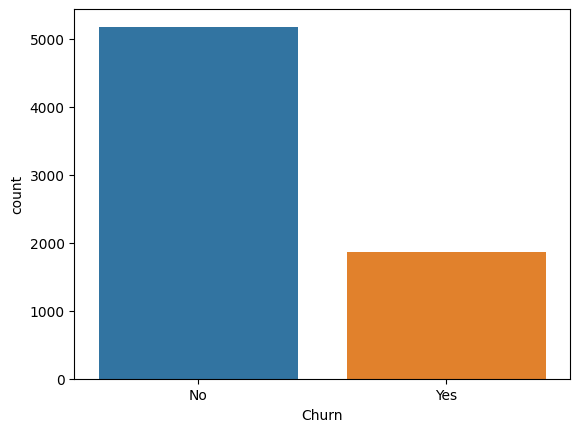

In [6]:
sns.countplot(x='Churn',data = df)

In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
Churned = df[df.Churn == 'Yes'].shape[0]
retained = df[df.Churn == 'No'].shape[0]

In [9]:
ch_p = ((Churned /(Churned+retained))*100)

In [10]:
ch_p

26.536987079369588

<Axes: xlabel='gender', ylabel='count'>

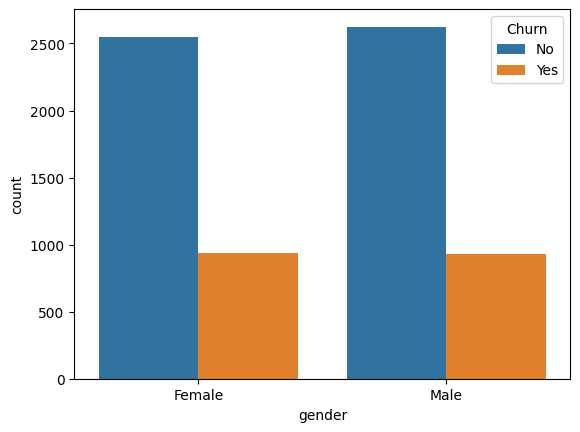

In [11]:
sns.countplot(x='gender',hue = 'Churn',data = df)

In [12]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

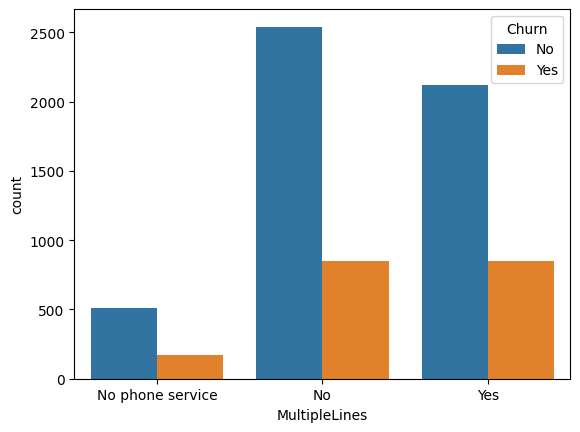

In [13]:
sns.countplot(x='MultipleLines',hue = 'Churn',data=df)

<Axes: xlabel='InternetService', ylabel='count'>

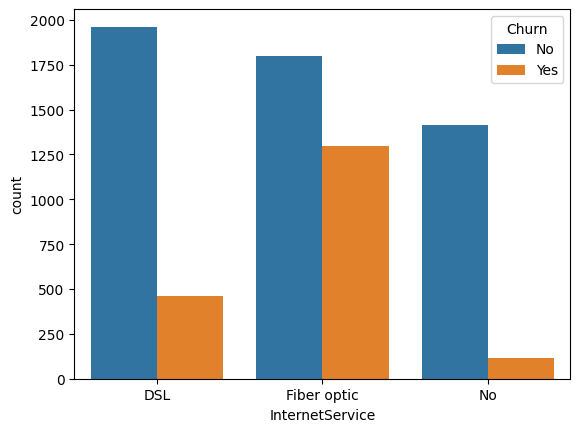

In [14]:
sns.countplot(x = 'InternetService',hue = 'Churn',data = df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

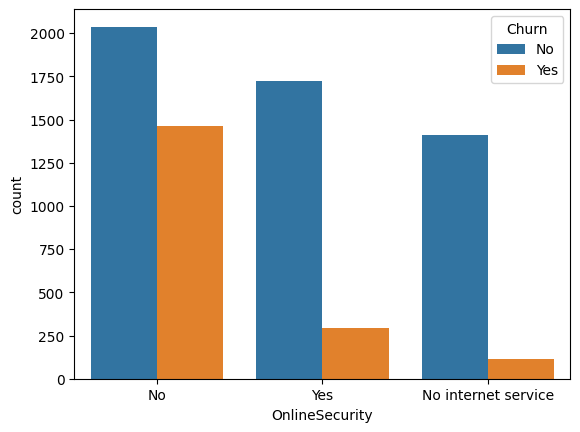

In [15]:
sns.countplot(x='OnlineSecurity',hue = 'Churn',data=df)

<Axes: xlabel='Contract', ylabel='count'>

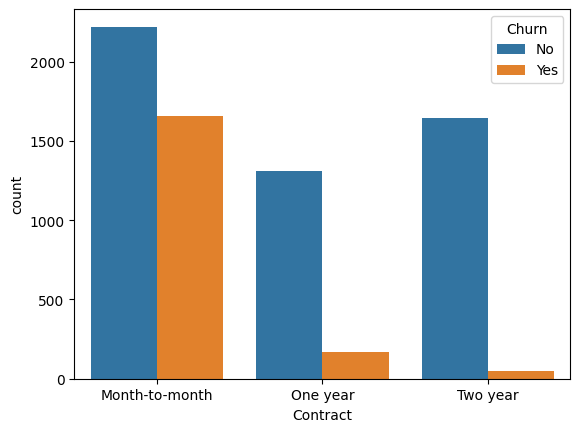

In [17]:
sns.countplot(x='Contract',hue = 'Churn',data=df)

# Data Preprocessing

In [18]:
df = df.drop(['customerID'],axis = 1)

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_6428\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_6428\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_6428\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_6428\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[

In [23]:
x = df.drop(['Churn'],axis =1)

In [24]:
y = df['Churn']

# Scaling Data Features

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
feature_x = StandardScaler().fit_transform(x)

In [27]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

# Spliting Data

In [28]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=1)

# Appling Machine Learning Algorithm

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(xtrain,ytrain)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
pred = model.predict(xtest)

In [57]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
model1 = MultinomialNB()

In [62]:
model1.fit(xtrain,ytrain)

MultinomialNB()

In [63]:
model.score(xtest,ytest)

0.8019872249822569

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model2 = RandomForestClassifier()

In [66]:
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [67]:
model2.score(xtest,ytest)

0.8034066713981547

# Checking Performance

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(ytest,pred)

0.8019872249822569

In [40]:
from sklearn.metrics import  confusion_matrix

In [41]:
confusion_matrix(ytest,pred)

array([[1164,  118],
       [ 217,  262]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

